# Data Findings - Ford Go Bike 2018 - San Francisco Bay
## Jaime Rado

## Investigation Overview

> This data set includes information about individual rides made within the bike-sharing system Ford Go Bike covering the greater San Francisco Bay area in 2018.

## Dataset Overview

> The following dataset shows information with regards to the bike-sharing usage in terms of time: **trip duration and start and end time**; place: **station id and location**; and user's profile: **user type, birthdate and gender**.

> There are 1.851.950 bike trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('df_clean_FordGoBike2018')

print(df_clean.shape)
print(df_clean.dtypes)
df_clean.head()

(1851950, 20)
duration_min               float64
start_time                  object
end_time                    object
start_time_month            object
start_time_type             object
start_time_day              object
start_time_hour              int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_min,start_time,end_time,start_time_month,start_time_type,start_time_day,start_time_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,1254.733333,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,January,Weekday,Wednesday,22,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
1,1423.700000,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,January,Weekday,Wednesday,16,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,0,NaN,No
2,1192.933333,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,January,Weekday,Wednesday,14,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
3,1017.933333,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,January,Weekday,Wednesday,14,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,0,NaN,No
4,666.100000,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,January,Weekday,Wednesday,19,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No


## Service Busiest's Times

> This service is **seasonal**, being the busiest months of the year from May to October (matching the "nicer weather" period).

> It is also more popular on **weekdays** (82.4% of the times)  and rush hours are from **8-9h and 17-18h** matching the commuting times.

> This service seems to match the consumer's need of using the bike-sharing system as a **commute option**.

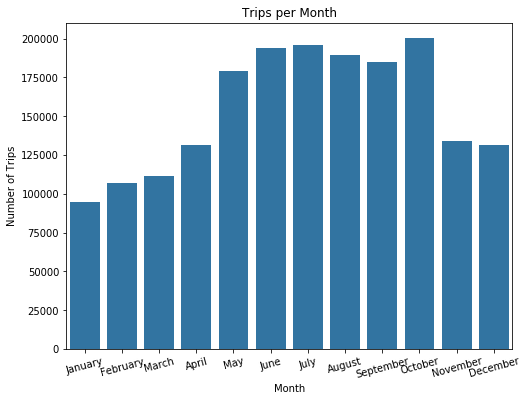

In [3]:
ordinal_var_dict = {'start_time_month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                    'start_time_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

base_color = sb.color_palette()[0]
plt.figure(figsize = [8,6])

sb.countplot(data = df_clean, x = 'start_time_month', color = base_color)
plt.xticks(rotation = 15)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips per Month');

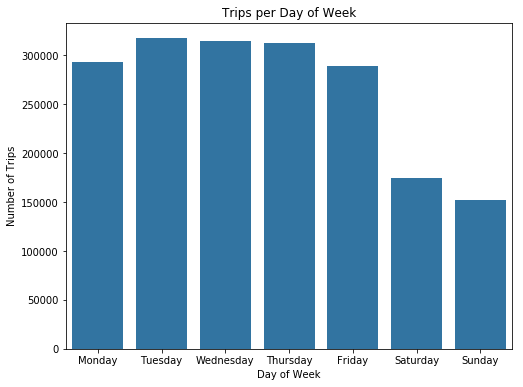

In [4]:
plt.figure(figsize = [8,6])

sb.countplot(data = df_clean, x = 'start_time_day', color = base_color)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips per Day of Week');

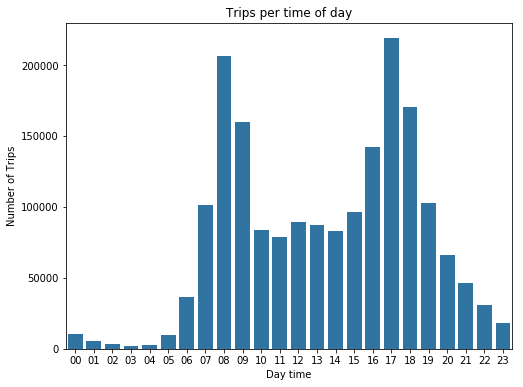

In [5]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)
df_clean['start_time_hour'] = df_clean.start_time.dt.strftime('%H')
hour_classes = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hours = pd.api.types.CategoricalDtype(ordered = True, categories = hour_classes)
df_clean['start_time_hour'] = df_clean['start_time_hour'].astype(hours)

plt.figure(figsize = [8,6])
sb.countplot(data = df_clean, x = 'start_time_hour', color = base_color)
plt.xlabel('Day time')
plt.ylabel('Number of Trips')
plt.title('Trips per time of day');

## Average Trip Duration

> The average trip duration is around **10 minuts**, although it is quite usual that **the trip takes 10 minuts or less**.

> We acknowledge also from the data that trips on weekends take 2 points longer than weekdays (around 12 minuts).

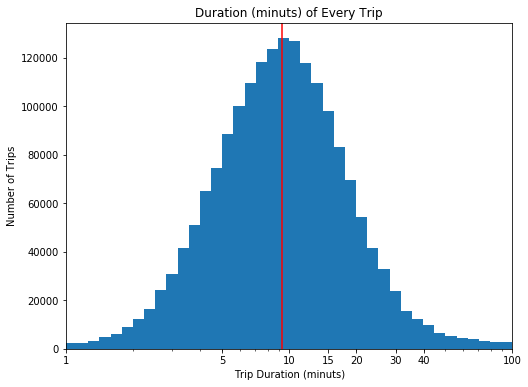

In [6]:
plt.figure(figsize=[8,6])
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max()) + log_binsize, log_binsize)

plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 5, 10, 15, 20, 30, 40, 100], [1, 5, 10, 15, 20, 30, 40, 100])
plt.xlim((1, 100))
plt.xlabel('Trip Duration (minuts)')
plt.ylabel('Number of Trips')
plt.title('Duration (minuts) of Every Trip')
plt.axvline(x = df_clean.duration_min.median(), color = 'red') # where the median value lies
plt.show();

## Who Uses This Service?

> **85% of users are subscribers** who use this service mainly on weekdays to commute.

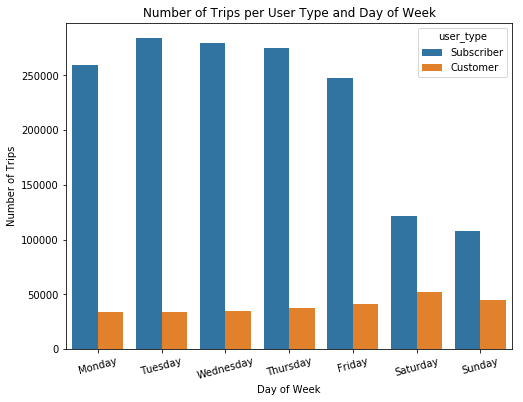

In [7]:
plt.figure(figsize=[8,6])

sb.countplot(data = df_clean, x = 'start_time_day', hue = 'user_type')
plt.xticks(rotation = 15)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per User Type and Day of Week');

## What about the other 15%?

> Casual customers represent the 15% and on average take **3 times longer** trips than subscribers.

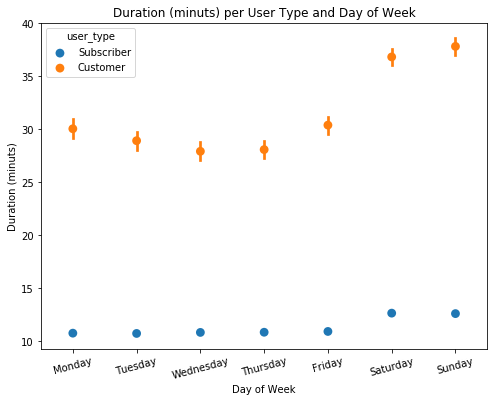

In [8]:
plt.figure(figsize=[8, 6])

sb.pointplot(data = df_clean, x = 'start_time_day', y = 'duration_min', hue = 'user_type',
            linestyles = "")
plt.xticks(rotation = 15)
plt.xlabel('Day of Week')
plt.ylabel('Duration (minuts)')
plt.title('Duration (minuts) per User Type and Day of Week');

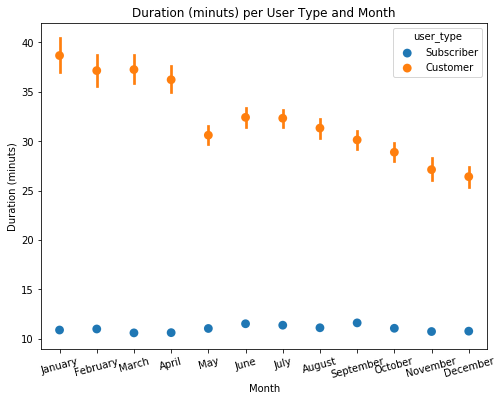

In [9]:
plt.figure(figsize=[8, 6])

sb.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type',
            linestyles = "")
plt.xticks(rotation = 15)
plt.xlabel('Month')
plt.ylabel('Duration (minuts)')
plt.title('Duration (minuts) per User Type and Month');

## Who is the common user?

> **Male on its 30s** is the most common user of this service.

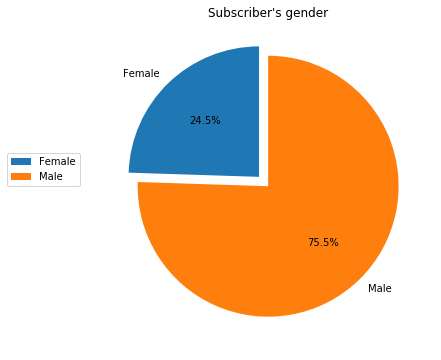

In [10]:
df_clean_birth_year = pd.read_csv('df_clean_birth_year_FordGoBike2018')

plt.figure(figsize=[8,6])

female_sub = len(df_clean[(df_clean['user_type'] == 'Subscriber') & (df_clean['member_gender'] == 'Female')])
male_sub = len(df_clean[(df_clean['user_type'] == 'Subscriber') & (df_clean['member_gender'] == 'Male')])

x_labels = ['Female', 'Male']
y = [female_sub, male_sub]
explode = (0.1, 0)
plt.pie(y, labels = x_labels, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend (labels = x_labels, loc = (-0.3, 0.5))
plt.title('Subscriber\'s gender');

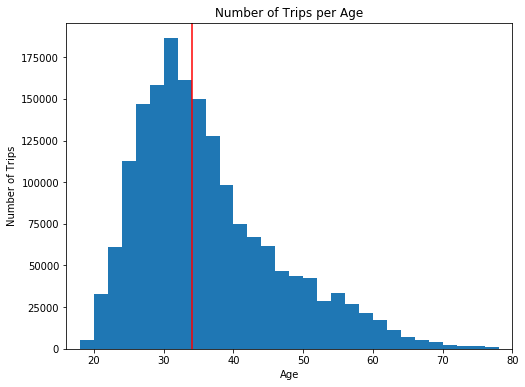

In [11]:
plt.figure(figsize=[8,6])

plt.hist(data = df_clean_birth_year, x = 'member_age', bins = np.arange(16, df_clean_birth_year['member_age'].max()+2, 2))
plt.xlim((16,80))
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Age')
plt.axvline(x = df_clean_birth_year.member_age.median(), color = 'red');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!